<a href="https://colab.research.google.com/github/akarshpyr/Python-codes/blob/main/NLP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread

In [2]:
!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import spacy

In [5]:
import string

In [6]:
from wordcloud import WordCloud

In [7]:
data = pd.read_csv('/content/apple.txt',error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 6: expected 1 fields, saw 14\n'


In [8]:
data

,x
0,It's amazing..... battery last around 10 -12 h...
1,Finally a MacBook possession. Got it in 50k in...
2,Best Laptop under 60k. If you don't want any a...
3,Pros:1. Light weight and super fast response t...
4,""""
5,I am very upset about the product as I checked...
6,Reason for 1 star is I ot an defective piece. ...
7,Got the Apple Macbook air on amazon discount s...
8,White line coming on screen in just three mont...
9,"Bought this product recently on 5 April, was w..."


In [9]:
data = [x.strip() for x in data.x]
data = [x for x in data if x]

In [10]:
data[0:10]

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by wo

In [11]:
nlp = spacy.load('en_core_web_sm')

In [12]:
one_block = data[2]
doc_block = nlp(one_block)

In [13]:
spacy.displacy.render(doc_block, style='ent',jupyter=True)

In [14]:
one_block

"Best Laptop under 60k. If you don't want any accounting softwares like tally or busy then go for it, better than windows in every term. I just love it's battery life with sleek look 😍Now talking about MS officeIt's available on app store, free for 1 monthAfter that you will have to pay.You cannot install pirated version but if you install Windows 7 or any other version then u can use Ms office for freeBut in MacBook there are other apps which are good substitute for Ms office appsNumbers for ExcelPages for wordKeynote for PowerPointAnd you can convert your numbers file to Excel file or csv fileSame for the pages & keynoteSo no need of Ms office for me.Cons1. U cannot play games, your laptop will just heat up, battery will drain* U cannot play pubg mobile on emulator if you are pubg lover😁2. Storage 128gb, it will work fine but if you want to store movies or TV shows u can't, u have to buy external hard disk"

In [15]:
for token in doc_block[0:20]:
  print(token,token.pos_)

Best ADJ
Laptop NOUN
under ADP
60k NOUN
. PUNCT
If SCONJ
you PRON
do AUX
n't PART
want VERB
any DET
accounting NOUN
softwares NOUN
like SCONJ
tally NOUN
or CCONJ
busy ADJ
then ADV
go VERB
for ADP


In [16]:
token.text

'for'

In [17]:
noun_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(noun_verbs)

['Laptop', '60k', 'want', 'accounting', 'softwares', 'tally', 'go', 'windows', 'term', 'love', 'battery', 'life', 'look', '😍', 'talking', 'app', 'store', 'monthAfter', 'will', 'pay', 'can', 'install', 'version', 'install', 'version', 'can', 'use', 'office', 'apps', 'substitute', 'office', 'appsNumbers', 'wordKeynote', 'can', 'convert', 'numbers', 'file', 'file', 'csv', 'fileSame', 'pages', 'need', 'office', 'can', 'play', 'games', 'laptop', 'will', 'heat', 'battery', 'will', 'drain', 'can', 'play', 'pubg', 'emulator', 'Storage', 'will', 'work', 'want', 'store', 'movies', 'TV', 'shows', 'ca', 'buy', 'disk']


In [18]:
from sklearn.feature_extraction.text import CountVectorizer 

In [19]:
cv = CountVectorizer()

In [20]:
x = cv.fit_transform(noun_verbs)

In [21]:
x.sum()

66

In [22]:
sum_words = x.sum(axis=0).tolist()[0]

In [24]:
word_freq = [(word,sum_words[idx]) for word, idx in cv.vocabulary_.items()]

In [25]:
word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)

In [26]:
wdf = pd.DataFrame(word_freq,columns = ['word','count'])

In [27]:
wdf

,word,count
0,can,5
1,will,4
2,office,3
3,laptop,2
4,want,2
5,battery,2
6,store,2
7,install,2
8,version,2
9,file,2


In [30]:
wdf1 = wdf.head(10)

In [31]:
wdf1

,word,count
0,can,5
1,will,4
2,office,3
3,laptop,2
4,want,2
5,battery,2
6,store,2
7,install,2
8,version,2
9,file,2


In [28]:
import seaborn as sns

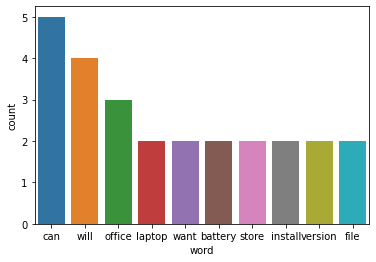

In [32]:
sns.barplot(x='word',y='count',data=wdf1)

In [33]:
affin = pd.read_csv('/content/Afinn.csv',sep=',',encoding='latin-1')

In [35]:
affin.shape

(2477, 2)

In [37]:
affin.head(20)

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
5,abductions,-2
6,abhor,-3
7,abhorred,-3
8,abhorrent,-3
9,abhors,-3


In [38]:
data = pd.read_csv('/content/apple.txt', error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 6: expected 1 fields, saw 14\n'


In [39]:
data = [x.strip() for x in data.x]
data = [x for x in data if x]

In [40]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [41]:
from nltk import tokenize

In [42]:
sentences = tokenize.sent_tokenize(''.join(data))

In [43]:
sentences[5:15]

['), all printers are not compatible (e.g.',
 "the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by working on these (still mostly the document and slides either do not open in windows environment or have distortion issues).",
 'you need to spend extra for an external CD writer and tp buy a carry bag.',
 'Mac con not be connected to most of the projectors unless you buy some connectors, which are expensive and theres no clarity which one to buy and from where.',
 "you can't connect it to your TV, the ports are different and again theres no clarity - customer support, manuals or help section are silent !",
 'Marketing strategy for Indian market, if at all has been planned, has been very bad.',
 'If these critical issues (and a few more not mentioned here) are handled properly, the Mac can sweep away other laptops in India.',
 "Presently, it doesn't seem to be happening.Overall V

In [45]:
sent_df = pd.DataFrame(sentences,columns = ['sentence'])

In [46]:
sent_df

,sentence
0,It's amazing..... battery last around 10 -12 h...
1,Got it in 50k in Diwali sale.
2,Technically good laptop.Good News.luxury produ...
3,Terrific sense of possession & pride.Bad News.
4,Problems will be there if you are switching fr...
...,...
159,"Coming to the performance, the speed of this i..."
160,You can get one of the best movie experiences ...
161,Overall I would it a 4.5/5.I got a great deal ...
162,I got it not only on discount but also was abl...


In [48]:
affinity_scores = affin.set_index('word')['value'].to_dict()

In [49]:
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [51]:
nlp = spacy.load('en_core_web_sm')

In [52]:
nlp

In [56]:
def calculate_sentiment(text: str=None):
  sent_score = 0
  if text:
    sentence=nlp(text)
    for word in sentence:
      sent_score += affinity_scores.get(word.lemma_,0)
  return sent_score

In [67]:
sent_df['senti_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [68]:
sent_df

,sentence,senti_value
0,It's amazing..... battery last around 10 -12 h...,7
1,Got it in 50k in Diwali sale.,0
2,Technically good laptop.Good News.luxury produ...,7
3,Terrific sense of possession & pride.Bad News.,4
4,Problems will be there if you are switching fr...,-11
...,...,...
159,"Coming to the performance, the speed of this i...",2
160,You can get one of the best movie experiences ...,3
161,Overall I would it a 4.5/5.I got a great deal ...,3
162,I got it not only on discount but also was abl...,0


In [70]:
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)

In [71]:
sent_df

,sentence,senti_value,word_count
0,It's amazing..... battery last around 10 -12 h...,7,16
1,Got it in 50k in Diwali sale.,0,7
2,Technically good laptop.Good News.luxury produ...,7,31
3,Terrific sense of possession & pride.Bad News.,4,7
4,Problems will be there if you are switching fr...,-11,65
...,...,...,...
159,"Coming to the performance, the speed of this i...",2,27
160,You can get one of the best movie experiences ...,3,12
161,Overall I would it a 4.5/5.I got a great deal ...,3,23
162,I got it not only on discount but also was abl...,0,18


In [73]:
a = sent_df.describe()

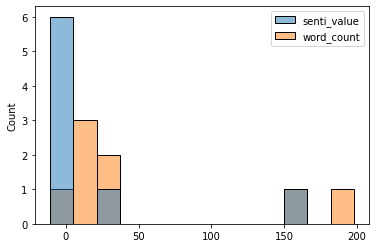

In [76]:
sns.histplot(a)

In [77]:
sent_df[sent_df['senti_value']<=0].head()

,sentence,senti_value,word_count
1,Got it in 50k in Diwali sale.,0,7
4,Problems will be there if you are switching fr...,-11,65
5,"), all printers are not compatible (e.g.",0,7
7,you need to spend extra for an external CD wri...,0,16
10,"Marketing strategy for Indian market, if at al...",-3,15


In [78]:
sent_df[sent_df['senti_value']>=20].head()

,sentence,senti_value,word_count
77,I used the laptop very carefully but I think A...,26,198


In [81]:
sent_df.iloc[77,:]

sentence       I used the laptop very carefully but I think A...
senti_value                                                   26
word_count                                                   198
Name: 77, dtype: object

In [82]:
sentences

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and codersFinally a MacBook possession.",
 'Got it in 50k in Diwali sale.',
 'Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better.',
 'Terrific sense of possession & pride.Bad News.',
 'Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!',
 '), all printers are not compatible (e.g.',
 "the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless

In [83]:
sent_df['index'] = range(0,len(sent_df))

In [84]:
sent_df

,sentence,senti_value,word_count,index
0,It's amazing..... battery last around 10 -12 h...,7,16,0
1,Got it in 50k in Diwali sale.,0,7,1
2,Technically good laptop.Good News.luxury produ...,7,31,2
3,Terrific sense of possession & pride.Bad News.,4,7,3
4,Problems will be there if you are switching fr...,-11,65,4
...,...,...,...,...
159,"Coming to the performance, the speed of this i...",2,27,159
160,You can get one of the best movie experiences ...,3,12,160
161,Overall I would it a 4.5/5.I got a great deal ...,3,23,161
162,I got it not only on discount but also was abl...,0,18,162


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


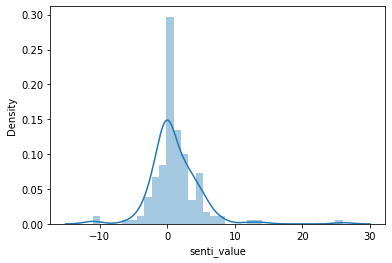

In [85]:
sns.distplot(sent_df['senti_value'])

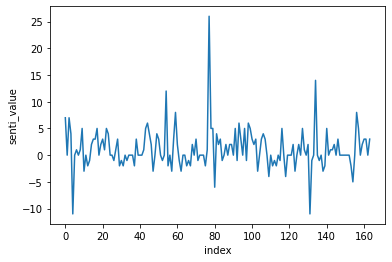

In [86]:
sns.lineplot(x='index',y='senti_value', data=sent_df)

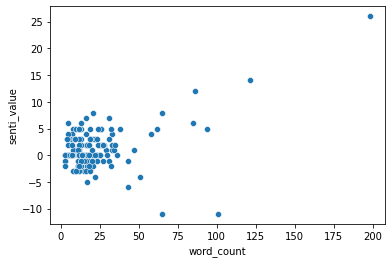

In [90]:
sns.scatterplot(x='word_count',y='senti_value',data=sent_df)